In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
import tensorflow as tf

In [3]:
print(tf.__version__)

2.0.0


In [4]:
from tensorflow.keras.datasets import mnist

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

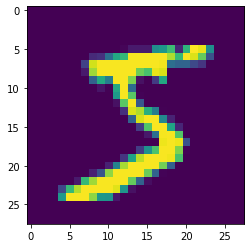

In [6]:
plt.imshow(X_train[0])

In [7]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [8]:
X_train.max()

255

In [9]:
X_train = X_train/255.0
X_test = X_test/255.0
X_train[0].shape

(28, 28)

In [10]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)
X_train[0].shape

(28, 28, 1)

In [11]:
input_shape = X_train[0].shape

In [12]:
model = Sequential()
model.add(Conv2D(
    filters=64,
    kernel_size=(3,3),
    activation='relu',
    input_shape=input_shape
))
model.add(Conv2D(
    filters=128,
    kernel_size=(3,3),
    activation='relu'
))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 18432)             0         
_________________________________________________________________
dense (Dense)                (None, 256)               4718848   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0

In [14]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(X_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 303s 5ms/sample - loss: 0.1777 - accuracy: 0.9455 - val_loss: 0.0428 - val_accuracy: 0.9856
Epoch 2/10
60000/60000 [==============================] - 309s 5ms/sample - loss: 0.0597 - accuracy: 0.9818 - val_loss: 0.0326 - val_accuracy: 0.9896
Epoch 3/10
60000/60000 [==============================] - 179s 3ms/sample - loss: 0.0440 - accuracy: 0.9864 - val_loss: 0.0316 - val_accuracy: 0.9897
Epoch 4/10
60000/60000 [==============================] - 153s 3ms/sample - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0262 - val_accuracy: 0.9919
Epoch 5/10
60000/60000 [==============================] - 150s 3ms/sample - loss: 0.0278 - accuracy: 0.9912 - val_loss: 0.0292 - val_accuracy: 0.9913
Epoch 6/10
60000/60000 [==============================] - 149s 2ms/sample - loss: 0.0228 - accuracy: 0.9926 - val_loss: 0.0256 - val_accuracy: 0.9923
Epoch 7/10
60000/60000 [==========================

In [16]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.03052706631999263, 0.993]

In [17]:
def plot_learningCurve(history, epochs):
  # Plot training & validation accuracy values
  epoch_range = range(1, epochs+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

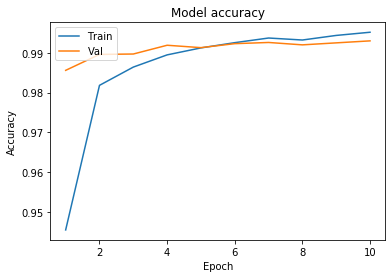

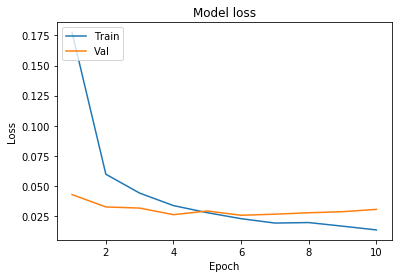

In [18]:
plot_learningCurve(history, 10)

In [19]:
history.history

{'loss': [0.17765523907343547,
  0.059722597616910934,
  0.04404242925047874,
  0.03367529152929783,
  0.027785426138341427,
  0.022810311684695384,
  0.01917670255905638,
  0.019584619982664784,
  0.016584789489302785,
  0.013482664879737422],
 'accuracy': [0.94553334,
  0.98183334,
  0.98641664,
  0.98948336,
  0.99123335,
  0.99255,
  0.99371666,
  0.9932167,
  0.99436665,
  0.99516666],
 'val_loss': [0.04280707985535264,
  0.03256501707362477,
  0.03161655738055706,
  0.026151990122301506,
  0.029192121977871285,
  0.025638246190734206,
  0.02654781591667561,
  0.02773072608569637,
  0.028637850790443963,
  0.030527066026811964],
 'val_accuracy': [0.9856,
  0.9896,
  0.9897,
  0.9919,
  0.9913,
  0.9923,
  0.9926,
  0.992,
  0.9925,
  0.993]}